<a href="https://colab.research.google.com/github/KevenAbraham/FATEC_MINERACAO_DADOS_2SEM2024/blob/main/Atividade_Aula_05_10_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
df = pd.read_csv('car_price_prediction_.csv')
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [8]:
df.isnull().sum()

,0
Car ID,0
Brand,0
Year,0
Engine Size,0
Fuel Type,0
Transmission,0
Mileage,0
Condition,0
Price,0
Model,0


In [12]:
df['Mileage'] = df['Mileage'].fillna(df['Price'].mean())

In [13]:
df['Fuel Type'] = df['Fuel Type'].fillna('Desconhecido')

In [14]:
df['Price'] = pd.to_numeric(df['Price'])
df['Brand'] = df['Brand'].astype('category')

In [15]:
df.describe()

,Car ID,Year,Engine Size,Mileage,Price
count,2500.00000,2500.0000,2500.000000,2500.000000,2500.000000
mean,1250.50000,2011.6268,3.465240,149749.844800,52638.022532
std,721.83216,6.9917,1.432053,87919.952034,27295.833455
min,1.00000,2000.0000,1.000000,15.000000,5011.270000
25%,625.75000,2005.0000,2.200000,71831.500000,28908.485000
50%,1250.50000,2012.0000,3.400000,149085.000000,53485.240000
75%,1875.25000,2018.0000,4.700000,225990.500000,75838.532500
max,2500.00000,2023.0000,6.000000,299967.000000,99982.590000


In [16]:
df['Brand'].value_counts()

,count
Brand,
Toyota,374
Audi,368
BMW,358
Mercedes,353
Honda,352
Tesla,348
Ford,347


<Axes: >

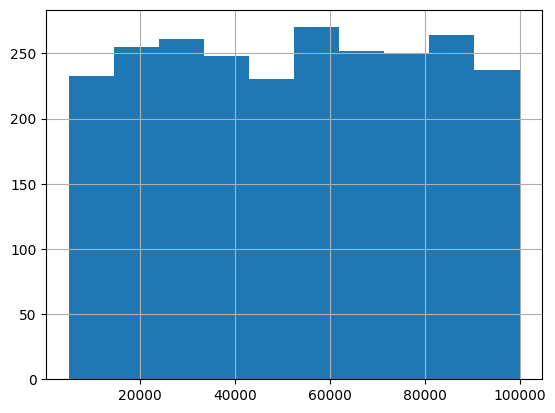

In [17]:
df['Price'].hist()

<Axes: >

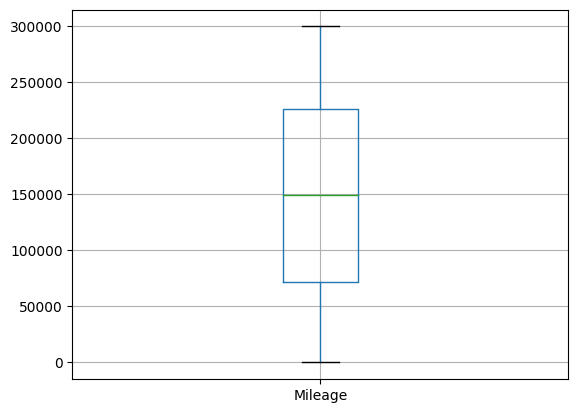

In [18]:
df.boxplot(column='Mileage')

<Axes: xlabel='Fuel Type'>

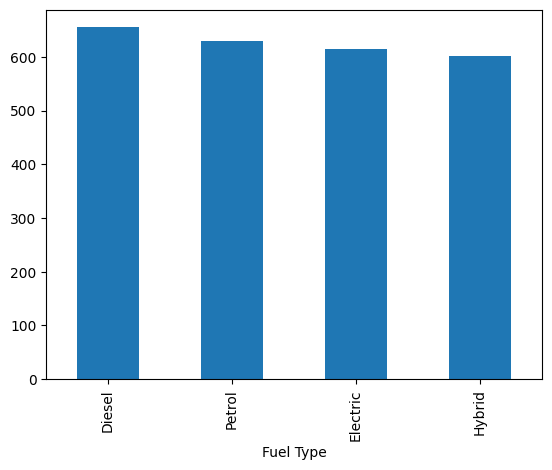

In [19]:
df['Fuel Type'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

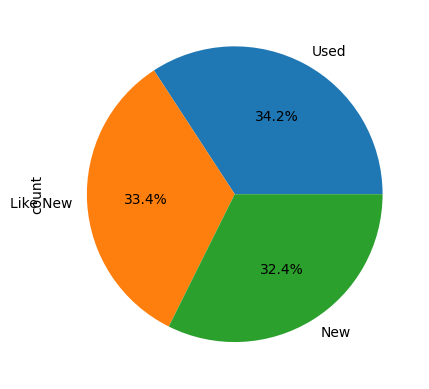

In [20]:
df['Condition'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: xlabel='Mileage', ylabel='Price'>

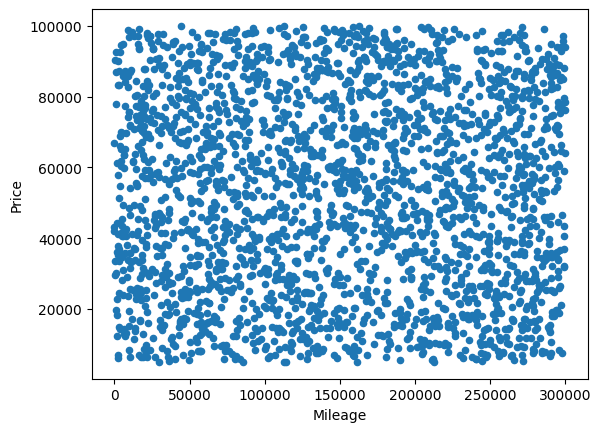

In [21]:
df.plot.scatter(x='Mileage', y='Price')

In [23]:
df[['Price', 'Mileage']].corr()

,Price,Mileage
Price,1.000000,-0.008567
Mileage,-0.008567,1.000000


# Atividade

### 1 - Quais padrões você observou nas variáveis numéricas? (exemplo: distribuição normal, outliers)

*Pelo histograma dos preços, notei que os valores estão bem distribuídos, sem uma concentração em um único ponto específico. Contudo, há alguns carros com preços mais altos, o que pode ser considerado como outliers. Mas, no boxplot da quilometragem, a maioria dos carros está concentrada em uma faixa específica. Há alguns com quilometragens muito elevadas, o que também pode caracterizar outliers.*

### 2 - Como estão distribuídas as variáveis categóricas? Alguma categoria se destaca em termos de frequência?

Olhando para as marcas, percebi que estão bem equilibradas, porém as marcas Tesla e BMW aparecem mais vezes. Já no tipo de combustível, os combustíveis `Petrol` e `Diesel` ainda são os mais comuns, mas os carros Electric estão começando a crescer nesse mercado. Analisando as condições dos carros, a maioria deles é marcada como New.

### 3 - Você identificou correlações entre variáveis numéricas? Qual pode ser a relação entre essas variáveis?

No gráfico de dispersão entre `Mileage` e `Price`, não deu para ver uma correlação muito clara, os pontos estão bem espalhados. Para que eu pudesse entender melhor, pesquisei um cálculo de correlação que ajudaria a confirmar se realmente não há uma ligação forte entre a quilometragem e o preço dos carros.

In [24]:
correlation = df[['Mileage', 'Price']].corr()

print("Correlação entre Mileage e Price:")
print(correlation)

Correlação entre Mileage e Price:
          Mileage     Price
Mileage  1.000000 -0.008567
Price   -0.008567  1.000000


### 4 - Com base nos dados, quais são as principais conclusões que você pode tirar? O que essas conclusões indicam para o contexto do dataset escolhido?

A distribuição está equilibrada entre as marcas. Isso mostra que há uma variedade de fabricantes, sem uma grande concentração em apenas uma. É notável que há mais carris novos, isso pode indicar que o foco do dataset está mais nos modelos recentes, ou que os vendedores preferem listar veículos em melhores condições. A falta de uma correlação forte entre os `Km rodados` e `Preço` sugere que outros fatorres, como a marca, o ano de fabriação e a condição, são mais relevantes para definir o preço. E apesar dos combustíveis tradicionais como `Gasolina` e `Diesel` serem os mais comuns, ver mais carros elétricos é um sinal interessante de que não só o mercado está mudando, como o gosto e preferência pelos consumidores estão mudando também!